# <a name="top"></a> Data Visualization with Pandas
###### เขียนโดย ศรัณย์ กุลยานนท์ เมื่อวันที่ 22 มี.ค. 2562

เราสามารถสร้างแผนภูมิจากข้อมูลใน Pandas DataFrame ได้เลย โดย Pandas สร้าง wrapper บน [matplotlib](https://matplotlib.org/) ซึ่งเป็น Python 2D plotting library ที่ได้รับความนิยมอย่างมาก ทำให้เราสามารถใช้ประโยชน์ matplotlib ได้เลยผ่าน Pandas โดยที่ไม่ต้องรู้เกี่ยวกับ matplotlib เลย

![Awesome](https://media.giphy.com/media/YXpp9YxWhyWBy/giphy.gif)

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
pd.options.display.max_rows = 20 # limit no. of rows displayed

ในคาบนี้ เราจะดูวิธีสร้างแผนภูมิ 6 ชนิด
1. [กราฟเส้น (Line Plot)](#lineplot)
2. [แผนภูมิแท่ง (Bar Plots)](#barplot)
3. [ฮิสโตแกรม (Histograms)](#histogram)
4. [แผนภาพกล่อง (Box Plots)](#boxplot)
5. [แผนภาพพื้นที่ (Area Plot)](#areaplot)
6. [กราฟจุด (Scatter Plot)](#scatter)
7. [Heat Map](#heatmap)
8. [แผนภูมิวงกลม (Pie Plot)](#pieplot)

----

## <a name="lineplot"></a> 1. กราฟเส้น (Line Plot)
กราฟเส้นจะถูกแสดงอยู่ใน figure

In [3]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum() # cumulative sum to get a random plot
print(ts)

2000-01-01     1.011409
2000-01-02     0.962140
2000-01-03     0.996895
2000-01-04     1.051441
2000-01-05    -0.489022
2000-01-06    -1.332102
2000-01-07    -0.774584
2000-01-08     0.155348
2000-01-09    -0.246074
2000-01-10    -0.446553
                ...    
2002-09-17   -42.842742
2002-09-18   -43.868904
2002-09-19   -44.257694
2002-09-20   -44.526322
2002-09-21   -44.043335
2002-09-22   -42.966165
2002-09-23   -41.646557
2002-09-24   -41.884510
2002-09-25   -42.419900
2002-09-26   -42.954055
Freq: D, Length: 1000, dtype: float64


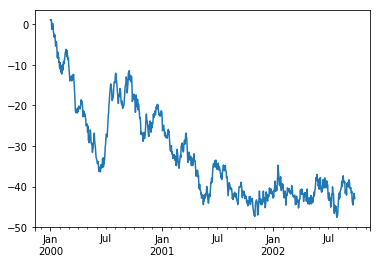

In [4]:
ts.plot()

สร้างกราฟเส้นหลายอันใน figure อันเดียว

ชื่อของคอลัมน์ถูกใส่ใน legend ของแผนภูมิให้ทันที

In [5]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()
df

,A,B,C,D
2000-01-01,0.021287,0.271132,-1.601750,0.643899
2000-01-02,0.654417,2.558979,-4.215128,-0.177635
2000-01-03,3.679721,1.917514,-4.511064,2.098469
2000-01-04,4.515002,2.428279,-6.082800,3.098235
2000-01-05,4.945317,2.626004,-6.079115,2.087863
2000-01-06,4.429366,2.456178,-6.629601,3.315421
2000-01-07,3.759213,2.273004,-6.659583,4.905090
2000-01-08,3.421625,-0.262223,-8.720643,6.236631
2000-01-09,2.511782,0.540786,-9.873115,6.735696
2000-01-10,1.835048,0.500845,-9.377540,6.653298


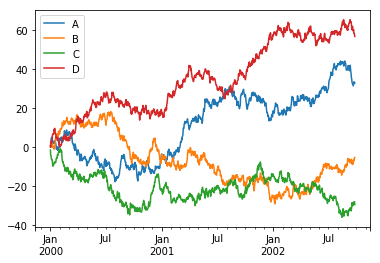

In [6]:
df.plot()

[To Top](#top)

----

## <a name="barplot"></a> 2. แผนภูมิแท่ง (Bar Plots)

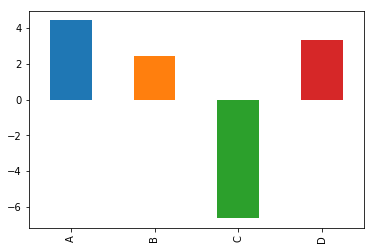

In [7]:
df.iloc[5].plot(kind='bar')

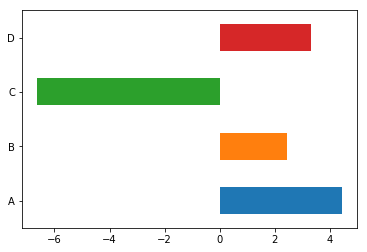

In [8]:
df.iloc[5].plot(kind='barh')

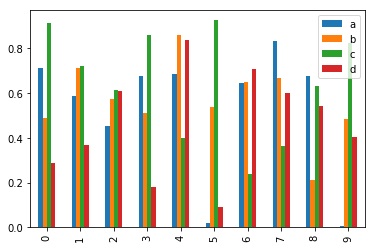

In [9]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df2.plot.bar();

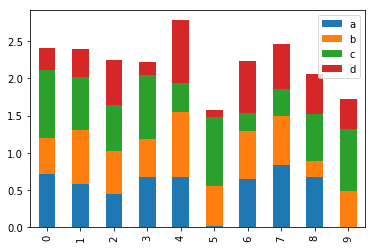

In [10]:
df2.plot.bar(stacked=True);

[To Top](#top)

----

## <a name="histogram"></a> 3. ฮิสโตแกรม (Histograms)
บอกการกระจายตัวของข้อมูล

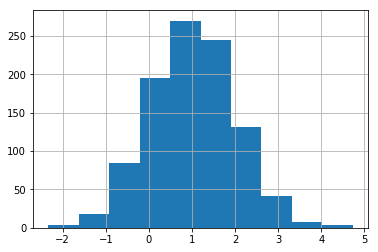

In [11]:
s3 = pd.Series(np.random.randn(1000) + 1)
s3.hist()

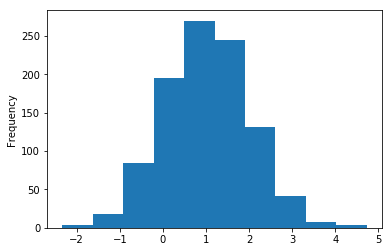

In [12]:
s3.plot.hist()

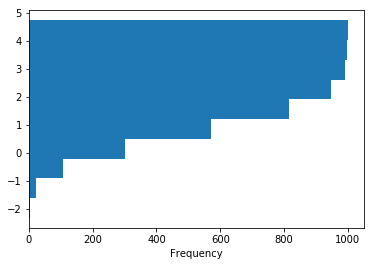

In [13]:
s3.plot.hist(orientation='horizontal', cumulative=True)

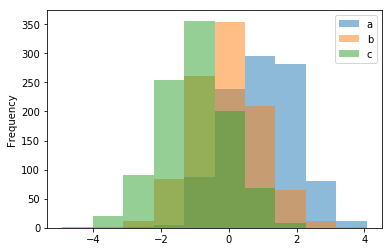

In [14]:
df3 = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000),
                    'c': np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])

df3.plot.hist(alpha=0.5)

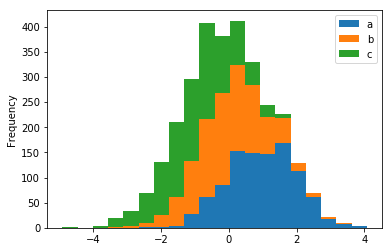

In [15]:
df3.plot.hist(stacked=True, bins=20)

In [16]:
df3.diff()

,a,b,c
0,NaN,NaN,NaN
1,-1.387998,-0.426254,-3.198992
2,1.005672,1.163708,0.629290
3,1.775571,1.081838,0.793903
4,-2.027709,0.637453,-0.470432
5,-0.388346,-0.418911,1.809019
6,2.652049,0.301420,-2.970608
7,-1.212812,-1.617425,1.863391
8,1.344248,0.141239,-0.165058
9,-4.404993,0.083474,-1.159529


[To Top](#top)

----

## <a name="boxplot"></a>  4. แผนภาพกล่อง (Box Plots)

[Box plot](https://en.wikipedia.org/wiki/Box_plot) เป็นแผนภูมิที่บอกข้อมูลสถิืติหลายอย่างภายในภาพเดียว เช่น quartiles, median, outliers (ค่าผิดปกติ) เป็นต้น

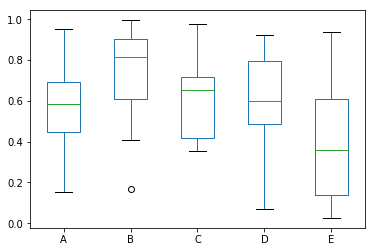

In [17]:
df4 = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
df4.plot.box()

คุณสามารถเปลี่ยนสีได้ทุกส่วนของแผนภาพ

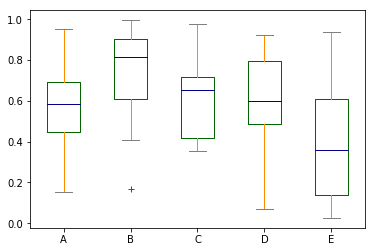

In [18]:
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange',
         'medians': 'DarkBlue', 'caps': 'Gray'}
df4.plot.box(color=color, sym='r+')

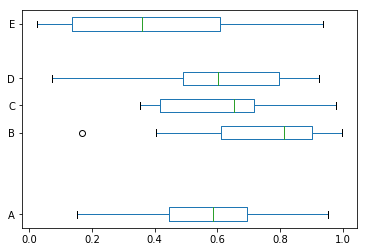

In [19]:
df4.plot.box(vert=False, positions=[1, 4, 5, 6, 8])

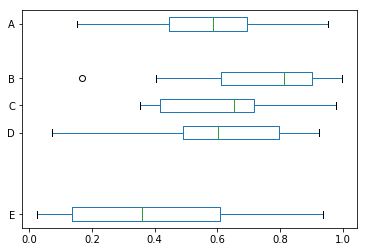

In [20]:
df4.plot.box(vert=False, positions=[8, 6, 5, 4, 1])

[To Top](#top)

----

## <a name="areaplot"></a>  5. แผนภาพพื้นที่ (Area Plot)

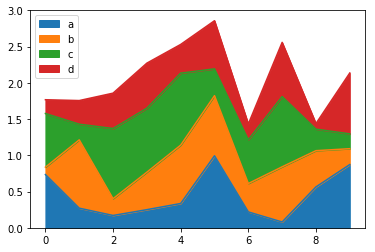

In [21]:
df5 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df5.plot.area()

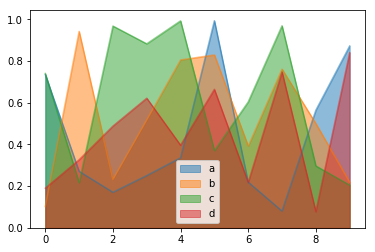

In [22]:
df5.plot.area(stacked=False);

[To Top](#top)

----

## <a name="scatter"></a>  6. กราฟจุด (Scatter Plot)

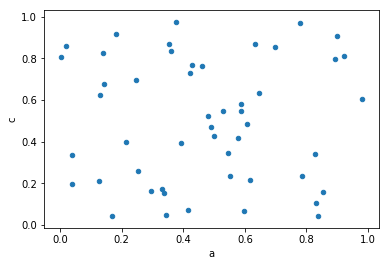

In [23]:
df6 = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])
df6.plot.scatter(x='a', y='c')

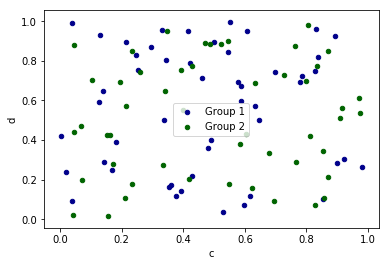

In [24]:
ax = df6.plot.scatter(x='a', y='b', color='DarkBlue', label='Group 1')
df6.plot.scatter(x='c', y='d', color='DarkGreen', label='Group 2', ax=ax)

สามารถปรับสีตามคุณสมบัติบางอย่าง มีโทนสี colormaps ต่างๆให้เลือก สามารถดูได้ที่ https://matplotlib.org/tutorials/colors/colormaps.html

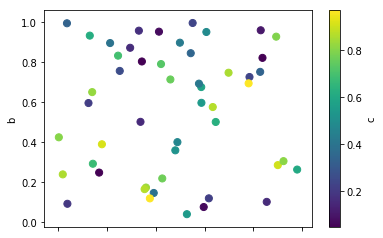

In [25]:
df6.plot.scatter(x='a', y='b', c='c', s=50, colormap='viridis')

เราสามารถเลือกสีต่างๆได้ โดยสีเหล่านี้จะมีชื่อของมันอยู่
![color_names](https://matplotlib.org/mpl_examples/color/named_colors.png)

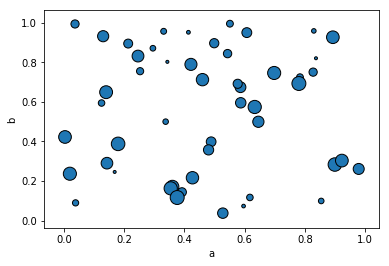

In [26]:
df6.plot.scatter(x='a', y='b', s=df6['c'] * 200, edgecolors='k')

[To Top](#top)

----

## <a name="heatmap"></a>  7. Heat Map
สำหรับ heat map เราใช้ library ชื่อ [seaborn](https://seaborn.pydata.org/)

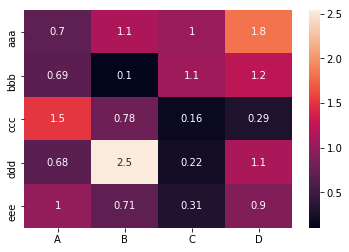

In [27]:
import seaborn as sns

Index= ['aaa', 'bbb', 'ccc', 'ddd', 'eee']
Cols = ['A', 'B', 'C', 'D']
df7 = pd.DataFrame(abs(np.random.randn(5, 4)), index=Index, columns=Cols)

sns.heatmap(df7, annot=True)

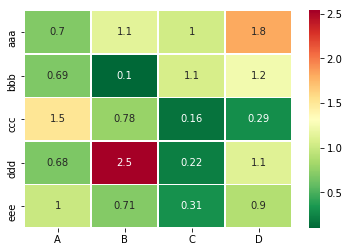

In [28]:
sns.heatmap(df7, cmap='RdYlGn_r', linewidths=0.5, annot=True)

ใน seaborn คุณสามารถสร้าง colormap ของคุณเองได้ โดยใช้ฟังก์ชัน [diverging_palette] ซึ่งสามารถใช้ร่วมกับ Pandas ได้ (https://seaborn.pydata.org/generated/seaborn.diverging_palette.html)

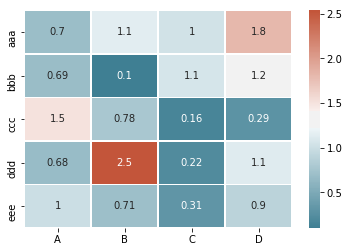

In [29]:
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.heatmap(df7, cmap=cmap, linewidths=0.5, annot=True)

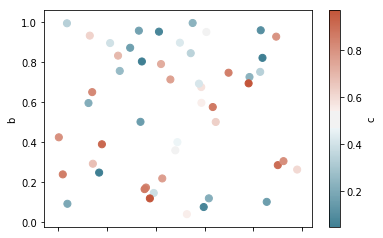

In [30]:
df6.plot.scatter(x='a', y='b', c='c', s=50, colormap=cmap)

[To Top](#top)

----

## <a name="pieplot"></a> 8. แผนภูมิวงกลม (Pie Plot)


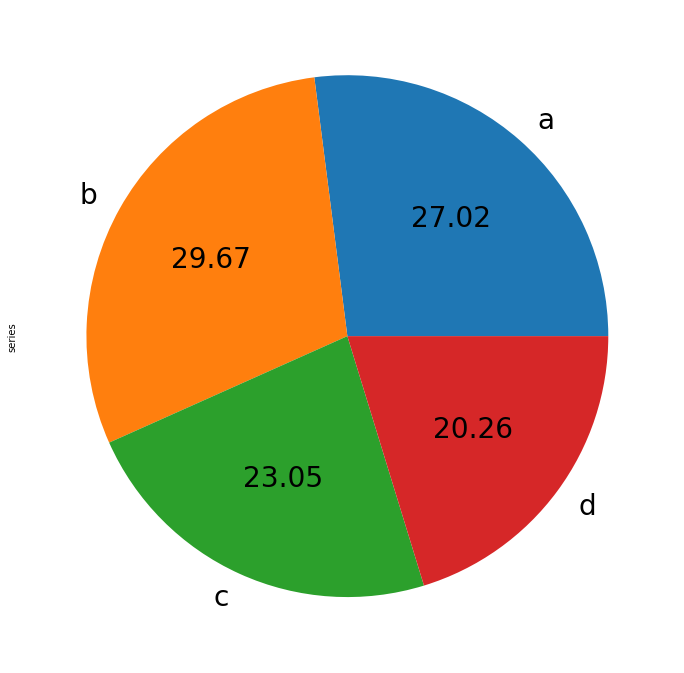

In [31]:
s8 = pd.Series(3 * np.random.rand(4), index=['a', 'b', 'c', 'd'], name='series')
s8.plot.pie(figsize=(12, 12), fontsize=28, autopct='%.2f')

[To Top](#top)

----

นอกเหนือจาก [Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html), [Matplotlib](https://matplotlib.org/), [Seaborn](https://seaborn.pydata.org/) ใน Python ยังมี Library สำหรับแสดงผลอีกมากมายให้เลือกใช้ เช่น 
* [Plotly](https://plot.ly/python/)
* [Bokeh](https://bokeh.pydata.org/en/latest/)
* [Folium](https://python-visualization.github.io/folium/)

In [32]:
!pip install folium
import folium
m = folium.Map(location=[45.5236, -122.6750])
m